In [1]:
import numpy as np
import numpy.random
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
%matplotlib inline

In [2]:
mpl.rcParams.update({'font.size': 18}) # because I'm tired of looking at small fonts and you should be too

In [3]:
numpy.random.seed(12345)

# make the data
# horse
numpts_H = 50
horse_weight = numpy.random.rand(numpts_H, 1) * 1500.0 + 400.0     # lbs
horse_height = horse_weight/370 + numpy.random.normal(0, 0.5, horse_weight.shape) + 2  # ft

# dog
numpts_D = 30
dog_weight = numpy.random.rand(numpts_D, 1) * 800.0 + 10.0      # lbs
dog_height = dog_weight/300 + numpy.random.normal(0, 0.5, dog_weight.shape) + 1  # ft

# make features array
X_horse = np.hstack((horse_weight, horse_height))
X_dog = np.hstack((dog_weight, dog_height))
X = np.vstack((X_horse, X_dog))

# target -  horses are 0, dogs are 1
y = np.vstack((np.zeros(horse_weight.shape),np.ones(dog_weight.shape)))

# print out all the shapes to make sure it's all consistent
print("First 3 rows of X_horse")
print(X_horse[:3,:])
print("X_horse shape: {0}".format(X_horse.shape))

print("\nFirst 3 rows of X_dog")
print(X_dog[:3,:])
print("X_dog shape: {0}".format(X_dog.shape))

print("\nX shape: {0}".format(X.shape))
print("y shape: {0}\n".format(y.shape))

First 3 rows of X_horse
[[ 1794.42413923     6.21682773]
 [  874.56333187     4.42359824]
 [  675.87821752     3.29494166]]
X_horse shape: (50, 2)

First 3 rows of X_dog
[[ 578.89276408    3.39462693]
 [ 211.93348564    0.92180965]
 [ 730.12774679    2.92251567]]
X_dog shape: (30, 2)

X shape: (80, 2)
y shape: (80, 1)



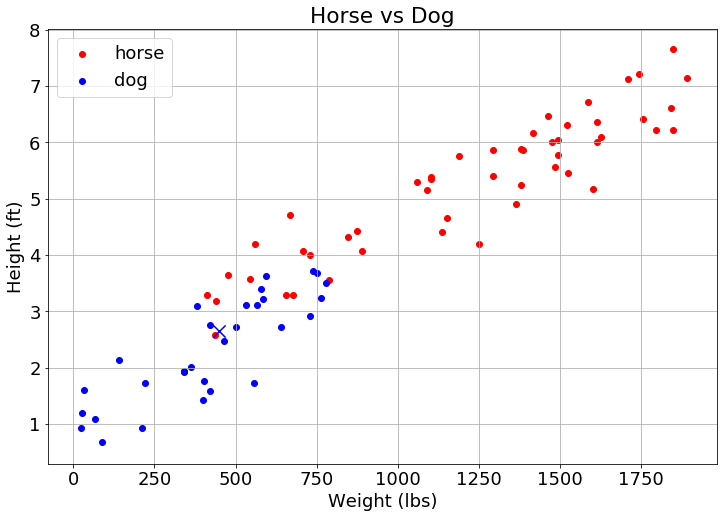

In [8]:
# set k
k = 5 # how many neighbors should the new datapoints classification be based on?

# set value of new point of interest
weight_p = 450.0 # lbs
height_p = 2.65  # ft

X_p = np.array([weight_p, height_p]).reshape(1, 2)

# fit
model = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
#not weighting by distance
knn = make_pipeline(StandardScaler(), model)
# pipline use standard scaler then make a model, using distances as a metric needd to scale
# pipline will remember the standard scaler, will predict on standardize features (x-mean/std)
knn.fit(X, y.ravel()) # ravel because requires 1D array, what??????

y_p = knn.predict(X_p).reshape(1,1)

# color data points by class consistently
def color_data_by_class(val):
    return 'r' if val == 0 else 'b'
c_p = np.apply_along_axis(color_data_by_class, 1, y_p)

# plot the new data point and its classification
plt.figure(figsize = (12,8))
plt.scatter(X_horse[:, 0], X_horse[:, 1], c='r', label = 'horse')
plt.scatter(X_dog[:, 0], X_dog[:, 1], c='b', label = 'dog')
plt.scatter(X_p[:, 0], X_p[:, 1], marker = 'x', s = 150, c=c_p)
plt.title("Horse vs Dog")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (ft)")
plt.legend()
plt.grid();

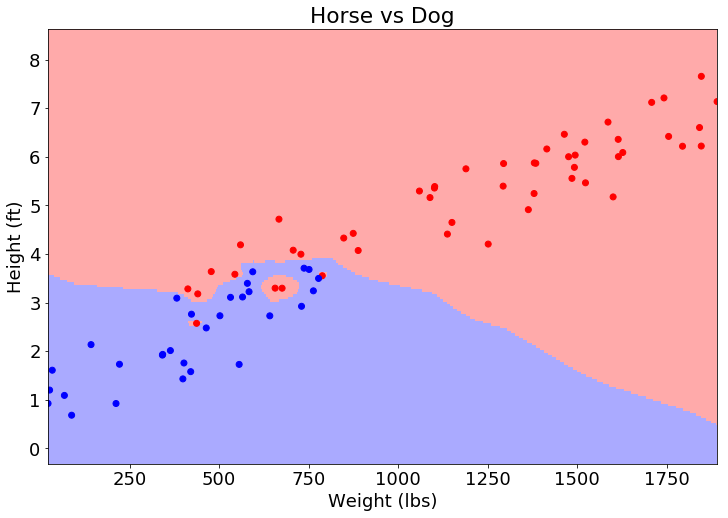

In [18]:
# plot decision boundaries with different complexities
# set k
k = 4

hx = 0.1  # step size in the mesh
hy = 0.1
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# fit
clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance')
clf = make_pipeline(StandardScaler(), clf) # comment this out
clf.fit(X, y.ravel()) # ravel because requires 1D array

# make mesh predictions
hx, hy = 0.5, 0.05 # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),
                     np.arange(y_min, y_max, hy))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize = (12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Horse vs Dog")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (ft)");

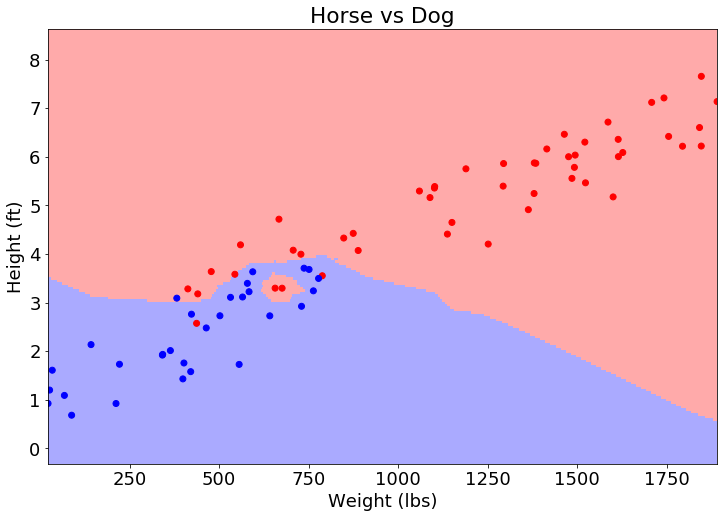

In [6]:
# plot decision boundaries with different complexities
# set k
k = 3

hx = 0.1  # step size in the mesh
hy = 0.1
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# fit
clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
clf = make_pipeline(StandardScaler(), clf)
clf.fit(X, y.ravel()) # ravel because requires 1D array

# make mesh predictions
hx, hy = 0.5, 0.05 # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),
                     np.arange(y_min, y_max, hy))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize = (12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Horse vs Dog")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (ft)")
plt.show();

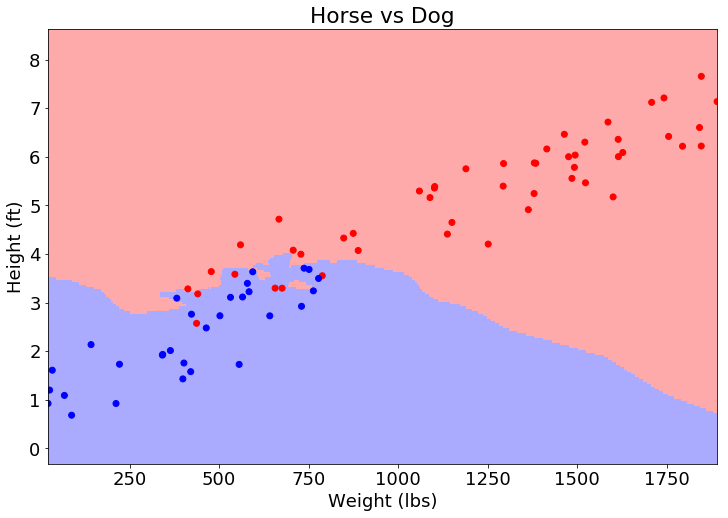

In [7]:
# plot decision boundaries with different complexities
# set k
k = 5

hx = 0.1  # step size in the mesh
hy = 0.1
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# fit
clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
clf = make_pipeline(StandardScaler(), clf)
clf.fit(X, y.ravel()) # ravel because requires 1D array

# make mesh predictions
hx, hy = 0.5, 0.05 # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),
                     np.arange(y_min, y_max, hy))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize = (12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Horse vs Dog")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (ft)")
plt.show()

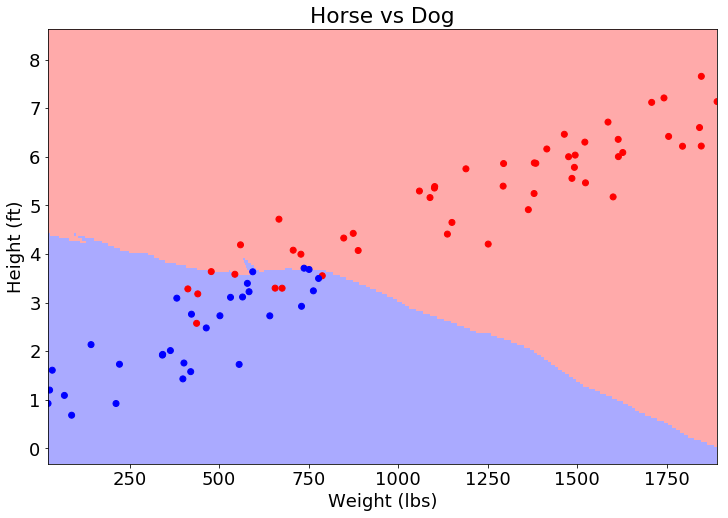

In [12]:
# plot decision boundaries with different complexities
# set k
k = 15

hx = 0.1  # step size in the mesh
hy = 0.1
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# fit
clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
clf = make_pipeline(StandardScaler(), clf)
clf.fit(X, y.ravel()) # ravel because requires 1D array

# make mesh predictions
hx, hy = 0.5, 0.05 # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),
                     np.arange(y_min, y_max, hy))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize = (12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Horse vs Dog")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (ft)");